In [1]:
#pip install wordcloud

## Importing the Twitter Dataset

In [2]:
import pandas as pd
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#  For Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


[nltk_data] Downloading package stopwords to /Users/rahul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df1 = pd.read_excel("appletweets.xlsx")
df2 = pd.read_excel("tweets.xlsx")
df = pd.concat([df1,df2])

In [4]:
df.shape

(1470, 16)

In [5]:
df.columns

Index(['text', 'favorited', 'favoriteCount', 'replyToSN', 'created',
       'truncated', 'replyToSID', 'id', 'replyToUID', 'statusSource',
       'screenName', 'retweetCount', 'isRetweet', 'retweeted', 'longitude',
       'latitude'],
      dtype='object')

In [6]:
df[['text', 'favorited', 'favoriteCount', 'created', 'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted']].head()

,text,favorited,favoriteCount,created,statusSource,screenName,retweetCount,isRetweet,retweeted
0,#NFTCollection The Art of No Limits\n\n#Artist...,False,3,2023-07-17 13:48:56,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The__Renewables,0,False,False
1,RT @degame_l2y: 🎉 Join the #NFT Gaming Summer ...,False,0,2023-07-17 13:43:31,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hafiztausib,177,True,False
2,RT @V_TBot: Apple Reportedly Departs from Trad...,False,0,2023-07-17 13:30:34,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",entrepreneur_cm,1,True,False
3,Apple Reportedly Departs from Tradition with C...,False,0,2023-07-17 13:30:03,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",V_TBot,1,False,False
4,Downsizing Disney looks to unload its TV asset...,False,0,2023-07-17 13:15:32,"<a href=""https://mobile.twitter.com"" rel=""nofo...",MacDailyNews,0,False,False


In [7]:
df.isna().sum()

text                0
favorited           0
favoriteCount       0
replyToSN        1407
created             0
truncated           0
replyToSID       1407
id                  0
replyToUID       1407
statusSource        0
screenName          0
retweetCount        0
isRetweet           0
retweeted           0
longitude        1469
latitude         1469
dtype: int64

In [8]:
#df = df[['text','created','screenName']].drop_duplicates()
#df.shape

In [9]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,#NFTCollection The Art of No Limits\n\n#Artist...,False,3,NaN,2023-07-17 13:48:56,True,NaN,1680937631226396672,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The__Renewables,0,False,False,NaN,NaN
1,RT @degame_l2y: 🎉 Join the #NFT Gaming Summer ...,False,0,NaN,2023-07-17 13:43:31,False,NaN,1680936271185850368,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hafiztausib,177,True,False,NaN,NaN
2,RT @V_TBot: Apple Reportedly Departs from Trad...,False,0,NaN,2023-07-17 13:30:34,False,NaN,1680933010156449792,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",entrepreneur_cm,1,True,False,NaN,NaN
3,Apple Reportedly Departs from Tradition with C...,False,0,NaN,2023-07-17 13:30:03,True,NaN,1680932881915580416,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",V_TBot,1,False,False,NaN,NaN
4,Downsizing Disney looks to unload its TV asset...,False,0,NaN,2023-07-17 13:15:32,True,NaN,1680929225950281734,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",MacDailyNews,0,False,False,NaN,NaN


## Exploratory Data Analysis

In [10]:
df['retweetCount'].value_counts().sort_values(ascending=False)

retweetCount
0      513
1      148
2      120
3       80
4       56
59      51
6       45
983     44
22      41
70      33
8       31
31      30
7       29
86      28
27      25
61      25
47      23
5       22
24      20
177     12
11      12
9       12
18      11
19      11
13       7
616      7
10       4
12       3
63       2
50       2
16       2
17       2
20       2
48       2
23       2
192      1
15       1
64       1
89       1
37       1
85       1
65       1
60       1
14       1
145      1
35       1
115      1
38       1
Name: count, dtype: int64

In [11]:
import re
from nltk.tag import pos_tag

def text_preprocessing(dataframe, dependent_var):
  # Normalizing Case Folding - Uppercase to Lowercase
    dataframe['cleaned_text'] = dataframe[dependent_var].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

  # Removing Punctuation
    dataframe['cleaned_text'] = dataframe['cleaned_text'].str.replace('[^\w\s]','')
    
  # Removing Numbers
    dataframe['cleaned_text'] = dataframe['cleaned_text'].str.replace('\d','')

  # StopWords
    sw = stopwords.words('english')
    dataframe['cleaned_text'] = dataframe['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

  # Remove Rare Words
    temp_df = pd.Series(' '.join(dataframe['cleaned_text']).split()).value_counts()
    drops = temp_df[temp_df <= 1]
    dataframe['cleaned_text'] = dataframe['cleaned_text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

    
  # Lemmatize
    #dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    def remove_emoticons_symbols(text):
        # Remove emoticons
        text = re.sub(r'(:\s?\)|:-\)|;\)|:\(|:-\(|;\(|:\'\(|:\'\))', '', text)
    
        # Remove symbols
        text = re.sub(r'[^\w\s]', '', text)
    
        return text

    # Apply the function to the 'text' column
    df['cleaned_text'] = dataframe['cleaned_text'].apply(remove_emoticons_symbols)
    return dataframe

In [12]:
text_preprocessing(df,'text')

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,cleaned_text
0,#NFTCollection The Art of No Limits\n\n#Artist...,False,3,NaN,2023-07-17 13:48:56,True,NaN,1680937631226396672,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The__Renewables,0,False,False,NaN,NaN,nftcollection art limits artist gordon bergman...
1,RT @degame_l2y: 🎉 Join the #NFT Gaming Summer ...,False,0,NaN,2023-07-17 13:43:31,False,NaN,1680936271185850368,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hafiztausib,177,True,False,NaN,NaN,rt degame_l2y join nft gaming summer event br...
2,RT @V_TBot: Apple Reportedly Departs from Trad...,False,0,NaN,2023-07-17 13:30:34,False,NaN,1680933010156449792,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",entrepreneur_cm,1,True,False,NaN,NaN,rt v_tbot apple reportedly departs tradition c...
3,Apple Reportedly Departs from Tradition with C...,False,0,NaN,2023-07-17 13:30:03,True,NaN,1680932881915580416,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",V_TBot,1,False,False,NaN,NaN,apple reportedly departs tradition creation de...
4,Downsizing Disney looks to unload its TV asset...,False,0,NaN,2023-07-17 13:15:32,True,NaN,1680929225950281734,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",MacDailyNews,0,False,False,NaN,NaN,looks tv apple may disney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,🏗️👓 The integration of Virtual Reality in arch...,False,1,NaN,2023-08-01 02:44:16,True,NaN,1686206179649699841,NaN,"<a href=""http://twitter.com/download/android"" ...",od1nstudios,0,False,False,NaN,NaN,integration virtual reality leap desig
466,Funny. #r6s #Jager #r6siege #r6 #Ubisoft #Rain...,False,1,NaN,2023-08-01 02:00:00,False,NaN,1686195041142788096,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",CherylP04686813,0,False,False,NaN,NaN,r6s jager r6siege r6 ubisoft rainbowsixsiege a...
467,🍎 Excited to learn about Apple's VisionPro tec...,False,1,NaN,2023-08-01 01:00:02,True,NaN,1686179948468502528,NaN,"<a href=""http://twitter.com/download/android"" ...",gardaran_com,0,False,False,NaN,NaN,excited learn apples visionpro advanced compu...
468,🥳🥳 #WearableTech #SmartWatch #AppleVisionPro #...,False,0,NaN,2023-07-31 23:36:17,False,NaN,1686158874498256897,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Frydach67c,0,False,False,NaN,NaN,wearabletech smartwatch applevisionpro applew...


In [13]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [14]:
df[['text','cleaned_text']].head(10)

,text,cleaned_text
0,#NFTCollection The Art of No Limits\n\n#Artist...,nftcollection art limits artist gordon bergman...
1,RT @degame_l2y: 🎉 Join the #NFT Gaming Summer ...,rt degame_l2y join nft gaming summer event br...
2,RT @V_TBot: Apple Reportedly Departs from Trad...,rt v_tbot apple reportedly departs tradition c...
3,Apple Reportedly Departs from Tradition with C...,apple reportedly departs tradition creation de...
4,Downsizing Disney looks to unload its TV asset...,looks tv apple may disney
5,RT @kazonomics: What do u know got the timing ...,rt kazonomics u know got timing right applevis...
6,#NFTCollection The Art of No Limits\n\n#Artist...,nftcollection art limits artist gordon bergman...
7,RT @kazonomics: What do u know got the timing ...,rt kazonomics u know got timing right applevis...
8,@Analyticsindiam @Apple Bad news for all #Appl...,apple bad news applevisionpro enthusiast waiti...
9,I am STOKED out of my MIND for this game!!! 🙊🙊...,game r6s jager applevisionpro sixinvitational...


In [15]:
def text_visulaization(dataframe, dependent_var, barplot=True, wordcloud=True):
  # Calculation of Term Frequencies
    tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    tf.columns = ["words", "tf"]
    texts_to_remove = ["rt", "elyssaar",'elyssa']

    # Dropping rows based on specific texts
    tf= tf[~tf['words'].isin(texts_to_remove)]

    if barplot:
    # Bar Plot
        
        tf[tf["tf"]>100].plot.barh(x="words", y="tf")
        plt.title("Calculation of Term Frequencies : barplot")
        plt.show()

    if wordcloud:
    # WordCloud
        texts_to_remove = ["rt", "elyssaar",'elyssa']

    # Dropping rows based on specific texts
        text = " ".join(i for i in dataframe[dependent_var])
        for string in texts_to_remove:
            text = text.replace(string, '')
        wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(text)
        plt.figure(figsize=[10, 10])
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title("Calculation of Term Frequencies : wordcloud")
        plt.show()
        wordcloud.to_file("wordcloud.png")
        
    return tf

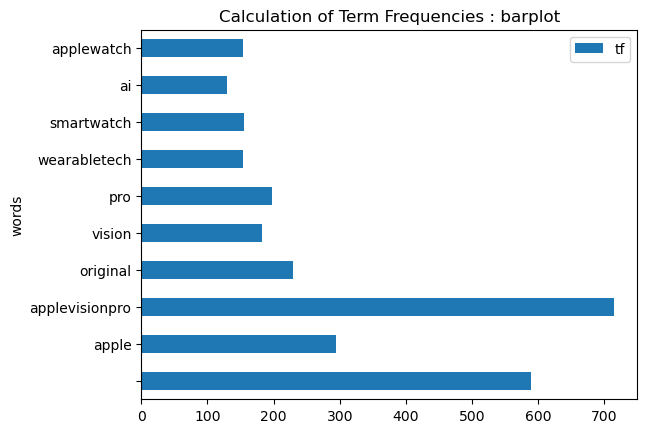

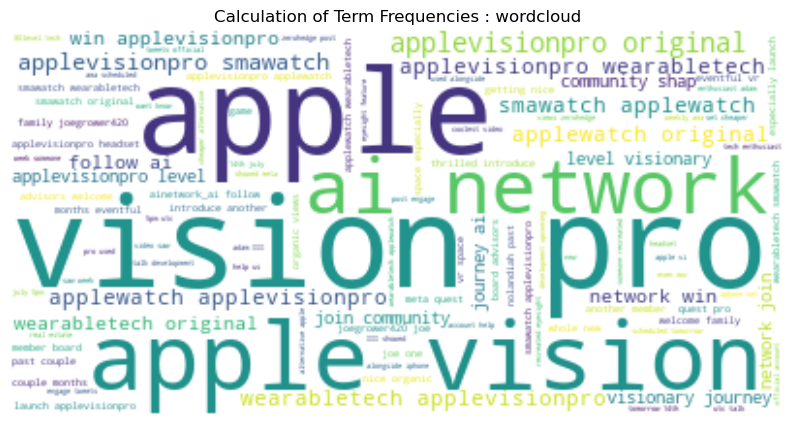

In [16]:
tf=text_visulaization(df, "cleaned_text")

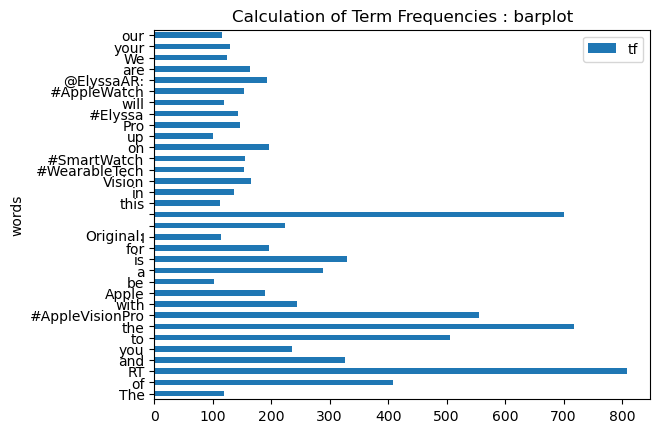

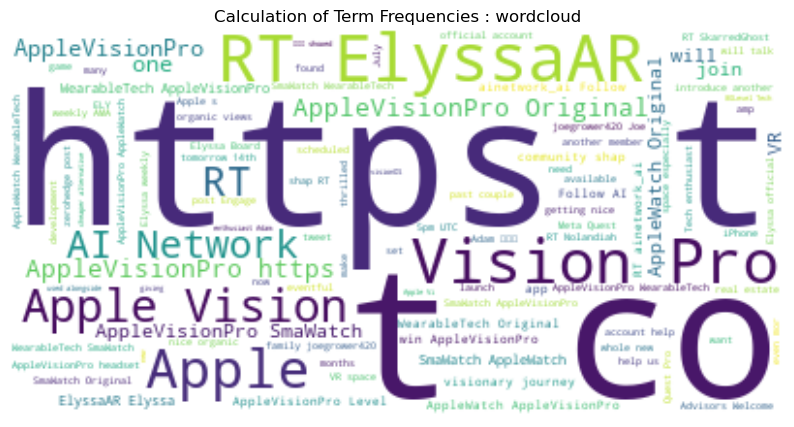

In [17]:
tf=text_visulaization(df, "text")

In [18]:
#df[['screenName','retweetCount']].groupby('screenName').sum().sort_values(ascending=False,by='retweetCount').head(60)

In [19]:
from textblob import TextBlob


# Function to determine sentiment of a tweet
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    sentiment_polarity = analysis.sentiment.polarity

    if sentiment_polarity > 0:
        return "Positive"
    elif sentiment_polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment analysis function to each tweet in the DataFrame
df['Sentiment'] = df['cleaned_text'].apply(get_tweet_sentiment)

# Display the DataFrame with sentiment analysis results
#print(df)

In [20]:
df['high_retweet']=0
df.loc[df['retweetCount']>37,'high_retweet']=1
df.groupby(['Sentiment','high_retweet'])['retweetCount'].sum()

Sentiment  high_retweet
Negative   0                1065
Neutral    0                2752
           1                4108
Positive   0                1920
           1               57088
Name: retweetCount, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler


# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the column to scale
X = scaler.fit_transform(df[['retweetCount']])

print(X)

[[-0.26495563]
 [ 0.76501172]
 [-0.2591366 ]
 ...
 [-0.26495563]
 [-0.26495563]
 [-0.26495563]]


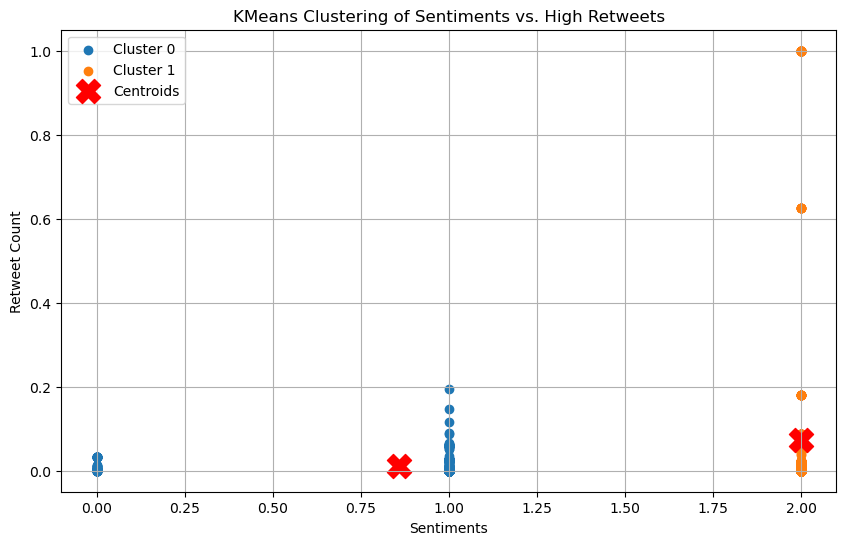

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans



# Convert 'sentiments' to numerical format
le = LabelEncoder()
df['sentiments_encoded'] = le.fit_transform(df['Sentiment'])

# Scale 'highretweets' column
scaler = MinMaxScaler()
df['retweets_scaled'] = scaler.fit_transform(df[['retweetCount']])

# Fit KMeans clustering model
# Assuming you want to cluster into 3 groups (can be adjusted based on your data and requirements)
kmeans = KMeans(n_clusters=2)
df['cluster'] = kmeans.fit_predict(df[['sentiments_encoded', 'retweets_scaled']])

# Visualizing the clusters
plt.figure(figsize=(10,6))
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['sentiments_encoded'], cluster_data['retweets_scaled'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Sentiments')
plt.ylabel('Retweet Count')
plt.title('KMeans Clustering of Sentiments vs. High Retweets')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
df.to_excel('cleaned_1.xlsx',index=False)

In [24]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
def preprocess(textstring):
    stops =  set(stopwords.words('english'))
    tokens = word_tokenize(textstring)
    return [token.lower() for token in tokens if token.isalpha() and token not in stops]

In [25]:
replace_dict = {
    '^rt ': '',
    'elyssaar': '',
    'elyssa':''
}

df['cleaned_text'] = df['cleaned_text'].replace(replace_dict)

In [26]:
cleaned_tokens=[]
for line in df[df['retweetCount']>37]['text']:
    cleaned_tokens.append(preprocess(line))

#print(cleaned_tokens)

In [27]:
#Gensim stuff from here
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from sklearn.decomposition import LatentDirichletAllocation


#Dictionary has all the words in the corpus
my_dictionary = Dictionary(cleaned_tokens)
print(len(my_dictionary))

print(my_dictionary)

#Create corpus
#Corpus has the bag of words-words and count
my_corpus = [my_dictionary.doc2bow(c) for c in cleaned_tokens]
#print(my_corpus)

# first doc-word
#Corpus has the bag of words
word_id, freq = my_corpus[0][0]
#the word is in the dictionary
word = my_dictionary[word_id]
#print(word)
print("The freq of" ,word,"is =",freq)

#the mapping required for lda to run
my_id2word = my_dictionary.id2token
#Intitialise the number of topics to 7
my_number_of_topics=10
#Train the topic model

myLDAmodel = LdaModel(corpus=my_corpus, id2word=my_id2word,iterations=400, num_topics=my_number_of_topics)
top_topics = list(myLDAmodel.top_topics(my_corpus))

#What are the words in each of the topic
#This lists words in topics
#for idx in range(my_number_of_topics):
#    print("Topic #%s:" % idx, myLDAmodel.print_topic(idx, 5))

199
Dictionary(199 unique tokens: ['brought', 'degame', 'event', 'gaming', 'including']...)
The freq of brought is = 1


In [28]:
#!pip install pyLDavis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
vis = gensimvis.prepare(topic_model=myLDAmodel, 
                              corpus=my_corpus, 
                              dictionary=my_dictionary)
pyLDAvis.display(vis)

In [29]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,cleaned_text,Sentiment,high_retweet,sentiments_encoded,retweets_scaled,cluster
0,#NFTCollection The Art of No Limits\n\n#Artist...,False,3,NaN,2023-07-17 13:48:56,True,NaN,1680937631226396672,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The__Renewables,0,False,False,NaN,NaN,nftcollection art limits artist gordon bergman...,Neutral,0,1,0.000000,0
1,RT @degame_l2y: 🎉 Join the #NFT Gaming Summer ...,False,0,NaN,2023-07-17 13:43:31,False,NaN,1680936271185850368,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hafiztausib,177,True,False,NaN,NaN,rt degame_l2y join nft gaming summer event br...,Positive,1,2,0.180061,1
2,RT @V_TBot: Apple Reportedly Departs from Trad...,False,0,NaN,2023-07-17 13:30:34,False,NaN,1680933010156449792,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",entrepreneur_cm,1,True,False,NaN,NaN,rt v_tbot apple reportedly departs tradition c...,Neutral,0,1,0.001017,0
3,Apple Reportedly Departs from Tradition with C...,False,0,NaN,2023-07-17 13:30:03,True,NaN,1680932881915580416,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",V_TBot,1,False,False,NaN,NaN,apple reportedly departs tradition creation de...,Neutral,0,1,0.001017,0
4,Downsizing Disney looks to unload its TV asset...,False,0,NaN,2023-07-17 13:15:32,True,NaN,1680929225950281734,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",MacDailyNews,0,False,False,NaN,NaN,looks tv apple may disney,Neutral,0,1,0.000000,0
